In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

# Utils

In [2]:
import pandas as pd

def read_scores_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    score_dict = {'Answerability': [], 'Clarity': [], 'Relevance': [], 'Difficulty': []}

    for line in lines:
        line = line.strip()  # Remove leading/trailing whitespace
        if line.startswith('[') and line.endswith(']'):
            # Extract aspect name
            cur_aspect = line[1:-1]  # Remove '[' and ']'
        elif line.startswith('Question'):
            # Split line to get question number and score
            parts = line.split(':')

            second_part = parts[1]
            score_parts = second_part.strip().split()
            score = float(score_parts[0].strip().split('/')[0])
            # Append data to lists
            score_dict[cur_aspect].append(score)

    score_df = pd.DataFrame(score_dict)
    return score_df

In [3]:
import pandas as pd

def read_distractor_scores_file(dis_file_path):
    with open(dis_file_path, 'r') as file:
        lines = file.readlines()

    score_dict = {'Readability': [], 'Incorrectness': [], 'Diversity': [], 'Plausibility': []}

    for line in lines:
        line = line.strip()  # Remove leading/trailing whitespace
        if line.startswith('[') and line.endswith(']'):
            cur_aspect = line[1:-1]  # Remove '[' and ']'
        elif line.startswith('Question'):
            question_part = line.split(':')[0]
            question_number = question_part.split()[1]

            dis_parts = line.replace(question_part, '')
            dis_parts = dis_parts[1:]

            dis_scores = []

            for dis_part in dis_parts.split(',')[:3]:
                dis_score = dis_part.split(':')[1].strip()
                dis_score = int(dis_score[0])
                dis_scores.append(dis_score)

            score_dict[cur_aspect].extend(dis_scores)

    score_df = pd.DataFrame(score_dict)
    return score_df

In [4]:
from sklearn.metrics import cohen_kappa_score

def get_kappa_corr(first_scores, second_scores, aspects=['Answerability', 'Clarity', 'Relevance', 'Difficulty']):
    for aspect in aspects:
        kappa_1_2 = cohen_kappa_score(first_scores[aspect], second_scores[aspect])

        print(f"For {aspect}:")
        print(f"Cohen's Kappa: {kappa_1_2}")
        print()

In [5]:
from scipy.stats import pearsonr

def get_pearson_corr(first_scores, second_scores, aspects=['Answerability', 'Clarity', 'Relevance', 'Difficulty']):
    for aspect in aspects:
        corr_coeff_1_2, p_value_1_2 = pearsonr(first_scores[aspect], second_scores[aspect])

        print(f"For {aspect}:")
        print(f"Pearson: {corr_coeff_1_2}")
        print()

In [6]:
import krippendorff

def get_krippendorff_corr(scores_list, aspects=['Answerability', 'Clarity', 'Relevance', 'Difficulty']):
    for aspect in aspects:
        corr = krippendorff.alpha([scorer[aspect] for scorer in scores_list])
        print(f"For {aspect}:")
        print(f"Krippendorff correlation: {corr}")
        print()

In [7]:
def compare_mean(baseline_model, my_model, aspects=['Answerability', 'Clarity', 'Relevance', 'Difficulty']):
    for aspect in aspects:
        print(f"For {aspect}:")
        print(f"Baseline model: {baseline_model[aspect].mean()}")
        print(f"My model: {my_model[aspect].mean()}")
        print()

In [8]:
def get_average_score_among_runs(runs, aspects=['Answerability', 'Clarity', 'Relevance', 'Difficulty']):
    score_dict = {aspects[0]: [], aspects[1]: [], aspects[2]: [], aspects[3]: []}
    for run in runs:
        for aspect in aspects:
            score_dict[aspect].append(list(run[aspect]))

    for aspect in aspects:
        score_dict[aspect] = np.mean(score_dict[aspect], axis=0)

    return pd.DataFrame(score_dict)    


In [9]:
def get_std(scores, aspects=['Answerability', 'Clarity', 'Relevance', 'Difficulty']):
    std_dict = {aspects[0]: [], aspects[1]: [], aspects[2]: [], aspects[3]: []}
    for aspect in aspects:
        std_dict[aspect] = np.std(scores[aspect])
    return std_dict

In [10]:
def get_average_score_among_articles(scores_dfs, aspects=['Answerability', 'Clarity', 'Relevance', 'Difficulty']):
    score_dict = {aspects[0]: [], aspects[1]: [], aspects[2]: [], aspects[3]: []}
    
    for scores_df in scores_dfs:
        for aspect in aspects:
            score_dict[aspect].extend(scores_df[aspect])

    for aspect in aspects:
        score_dict[aspect] = np.mean(score_dict[aspect])

    return score_dict


In [11]:
def plot_scores(scores, aspects=['Answerability', 'Clarity', 'Relevance', 'Difficulty']):
    bar_width = 0.35

    for i, aspect in enumerate(aspects):
        fig, ax = plt.subplots()
        plt.title(f"{aspect} score")

        score_counts = scores[aspect].value_counts()
        plt.bar(score_counts.index, score_counts.values, bar_width)
        plt.show()

In [12]:
def get_all_average(scores, aspects=['Answerability', 'Clarity', 'Relevance', 'Difficulty']):
    score_dict = {aspects[0]: [], aspects[1]: [], aspects[2]: [], aspects[3]: []}
    for aspect in aspects:
        for score in scores:
            score_dict[aspect].append(score[aspect])

    for aspect in aspects:
        score_dict[aspect] = np.mean(score_dict[aspect], axis=0)
    return score_dict

In [13]:
# bar chart comparing scores

import matplotlib.pyplot as plt
import numpy as np

def plot_comparision_bar_chart(baseline_means, my_model_means, baseline_sds, my_model_sds, aspects=['Answerability', 'Relevance', 'Clarity', 'Difficulty']):
    x = np.arange(len(aspects))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, baseline_means.values(), width, yerr=baseline_sds, label='Baseline', capsize=5)
    rects2 = ax.bar(x + width/2, my_model_means.values(), width, yerr=my_model_sds, label='My Model', capsize=5)

    ax.set_ylabel('Scores')
    ax.set_title('Scores Comparision by Criterion')
    ax.set_xticks(x)
    ax.set_xticklabels(aspects)
    ax.legend()

    fig.tight_layout()
    plt.show()


In [14]:
# comparison radar plot

import matplotlib.pyplot as plt
import numpy as np

def plot_comparision_radar_plot(baseline_means, my_model_means, baseline_sds, my_model_sds, aspects=['Answerability', 'Relevance', 'Clarity', 'Difficulty']):

    baseline_scores = list(baseline_means.values())
    my_model_scores = list(my_model_means.values())

    baseline_scores += baseline_scores[:1]
    my_model_scores += my_model_scores[:1]
    angles = np.linspace(0, 2 * np.pi, len(aspects), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, baseline_scores, color='blue', alpha=0.25, label='Baseline')
    ax.fill(angles, my_model_scores, color='red', alpha=0.25, label='My Model')
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(aspects)
    plt.legend(loc='upper right')
    plt.title('Radar Chart of My Model vs. Baseline Scores')
    plt.show()

In [15]:
def get_scores(topic, model_name, evaluator, run_number, distractor_scores=False):
    path = f'evaluation_prompt/{model_name}/{topic}/final_scores_{evaluator}_run_{run_number}.txt'
    if distractor_scores:
        path = f'evaluation_prompt/{model_name}/{topic}/distractor_final_scores_{evaluator}_run_{run_number}.txt'

    if distractor_scores:
        score_df = read_distractor_scores_file(path)
    else:
        score_df = read_scores_file(path)

    return score_df

# Actual Run

In [16]:
topic = "economic_depression"
baseline = "MixQG"
my_model = "my_model"
run_number = 1

# questions
gpt_score_path_baseline = f'evaluation_prompt/{baseline}/{topic}/final_scores_chat_gpt_4o_run_{run_number}.txt'
gemini_score_path_baseline = f'evaluation_prompt/{baseline}/{topic}/final_scores_gemini_run_{run_number}.txt'

gpt_score_path_my_model = f'evaluation_prompt/{my_model}/{topic}/final_scores_chat_gpt_4o_run_{run_number}.txt'
gemini_score_path_my_model = f'evaluation_prompt/{my_model}/{topic}/final_scores_gemini_run_{run_number}.txt'

# distractors
gpt_dis_score_path_baseline = f'evaluation_prompt/{baseline}/{topic}/distractor_final_scores_chat_gpt_4o_run_{run_number}.txt'
gemini_dis_score_path_baseline = f'evaluation_prompt/{baseline}/{topic}/distractor_final_scores_gemini_run_{run_number}.txt'

gpt_dis_score_path_my_model = f'evaluation_prompt/{my_model}/{topic}/distractor_final_scores_chat_gpt_4o_run_{run_number}.txt'
gemini_dis_score_path_my_model = f'evaluation_prompt/{my_model}/{topic}/distractor_final_scores_gemini_run_{run_number}.txt'

run_number = 2

# questions
gpt_score_path_baseline_2 = f'evaluation_prompt/{baseline}/{topic}/final_scores_chat_gpt_4o_run_{run_number}.txt'
gemini_score_path_baseline_2 = f'evaluation_prompt/{baseline}/{topic}/final_scores_gemini_run_{run_number}.txt'

gpt_score_path_my_model_2 = f'evaluation_prompt/{my_model}/{topic}/final_scores_chat_gpt_4o_run_{run_number}.txt'
gemini_score_path_my_model_2 = f'evaluation_prompt/{my_model}/{topic}/final_scores_gemini_run_{run_number}.txt'

# distractors
gpt_dis_score_path_baseline_2 = f'evaluation_prompt/{baseline}/{topic}/distractor_final_scores_chat_gpt_4o_run_{run_number}.txt'
gemini_dis_score_path_baseline_2 = f'evaluation_prompt/{baseline}/{topic}/distractor_final_scores_gemini_run_{run_number}.txt'

gpt_dis_score_path_my_model_2 = f'evaluation_prompt/{my_model}/{topic}/distractor_final_scores_chat_gpt_4o_run_{run_number}.txt'
gemini_dis_score_path_my_model_2 = f'evaluation_prompt/{my_model}/{topic}/distractor_final_scores_gemini_run_{run_number}.txt'

In [17]:
# first run
# questions
gpt_scores_baseline = read_scores_file(gpt_score_path_baseline)
gemini_scores_baseline = read_scores_file(gemini_score_path_baseline)

gpt_scores_my_model = read_scores_file(gpt_score_path_my_model)
gemini_scores_my_model = read_scores_file(gemini_score_path_my_model)

# distractors
gpt_dis_scores_baseline = read_distractor_scores_file(gpt_dis_score_path_baseline)
gemini_dis_scores_baseline = read_distractor_scores_file(gemini_dis_score_path_baseline)

gpt_dis_scores_my_model = read_distractor_scores_file(gpt_dis_score_path_my_model)
gemini_dis_scores_my_model = read_distractor_scores_file(gemini_dis_score_path_my_model)

# second run
# questions
gpt_scores_baseline_2 = read_scores_file(gpt_score_path_baseline_2)
gemini_scores_baseline_2 = read_scores_file(gemini_score_path_baseline_2)

gpt_scores_my_model_2 = read_scores_file(gpt_score_path_my_model_2)
gemini_scores_my_model_2 = read_scores_file(gemini_score_path_my_model_2)

# distractors
gpt_dis_scores_baseline_2 = read_distractor_scores_file(gpt_dis_score_path_baseline_2)
gemini_dis_scores_baseline_2 = read_distractor_scores_file(gemini_dis_score_path_baseline_2)

gpt_dis_scores_my_model_2 = read_distractor_scores_file(gpt_dis_score_path_my_model_2)
gemini_dis_scores_my_model_2 = read_distractor_scores_file(gemini_dis_score_path_my_model_2)

In [18]:
# questions
# average scores baseline 
avg_gpt_baseline = get_average_score_among_runs([gpt_scores_baseline, gpt_scores_baseline_2])
avg_gemini_baseline = get_average_score_among_runs([gemini_scores_baseline, gemini_scores_baseline_2])

# average scores my model
avg_gpt_my_model = get_average_score_among_runs([gpt_scores_my_model, gpt_scores_my_model_2])
avg_gemini_my_model = get_average_score_among_runs([gemini_scores_my_model, gemini_scores_my_model_2])

In [19]:
scores = get_scores(topic, model_name='my_model', evaluator='gemini', run_number=2, distractor_scores=False)

In [20]:
# graphs for questions:
# correlation between two LLMs of each article
# summary table: row are models (baseline and my model), columns are criteria
# score distribution of each model (with each model, average scores across all runs and articles are calcualated)

In [21]:
# graphs for distractors:
# correlation between two LLMs of each article
# summary table: row are models (baseline and my model), columns are criteria
# score distribution of each model (with each model, average scores across all runs and articles are calcualated)

GPT Baseline

In [22]:
# economic depression
gpt_baseline_economic_depression_1 = get_scores("economic_depression", model_name='mixqg', evaluator='chat_gpt_4o', run_number=1, distractor_scores=False)
gpt_baseline_economic_depression_2 = get_scores("economic_depression", model_name='mixqg', evaluator='chat_gpt_4o', run_number=2, distractor_scores=False)
gpt_baseline_economic_depression_avg = get_average_score_among_runs([gpt_baseline_economic_depression_1, gpt_baseline_economic_depression_2])

# personality
gpt_baseline_personality_1 = get_scores("personality", model_name='mixqg', evaluator='chat_gpt_4o', run_number=1, distractor_scores=False)
gpt_baseline_personality_2 = get_scores("personality", model_name='mixqg', evaluator='chat_gpt_4o', run_number=2, distractor_scores=False)
gpt_baseline_personality_avg = get_average_score_among_runs([gpt_baseline_personality_1, gpt_baseline_personality_2])

# personalized learning
gpt_baseline_personalized_learning_1 = get_scores("personalized_learning", model_name='mixqg', evaluator='chat_gpt_4o', run_number=1, distractor_scores=False)
gpt_baseline_personalized_learning_2 = get_scores("personalized_learning", model_name='mixqg', evaluator='chat_gpt_4o', run_number=2, distractor_scores=False)
gpt_baseline_personalized_learning_avg = get_average_score_among_runs([gpt_baseline_personalized_learning_1, gpt_baseline_personalized_learning_2])

# final all avera
gpt_baseline_avg = get_average_score_among_articles([gpt_baseline_economic_depression_avg, gpt_baseline_personality_avg, gpt_baseline_personalized_learning_avg])

Gemini Baseline

In [23]:
# economic depression
gemini_baseline_economic_depression_1 = get_scores("economic_depression", model_name='mixqg', evaluator='gemini', run_number=1, distractor_scores=False)
gemini_baseline_economic_depression_2 = get_scores("economic_depression", model_name='mixqg', evaluator='gemini', run_number=2, distractor_scores=False)
gemini_baseline_economic_depression_avg = get_average_score_among_runs([gemini_baseline_economic_depression_1, gemini_baseline_economic_depression_2])

# personality
gemini_baseline_personality_1 = get_scores("personality", model_name='mixqg', evaluator='gemini', run_number=1, distractor_scores=False)
gemini_baseline_personality_2 = get_scores("personality", model_name='mixqg', evaluator='gemini', run_number=2, distractor_scores=False)
gemini_baseline_personality_avg = get_average_score_among_runs([gemini_baseline_personality_1, gemini_baseline_personality_2])

# personalized learning
gemini_baseline_personalized_learning_1 = get_scores("personalized_learning", model_name='mixqg', evaluator='gemini', run_number=1, distractor_scores=False)
gemini_baseline_personalized_learning_2 = get_scores("personalized_learning", model_name='mixqg', evaluator='gemini', run_number=2, distractor_scores=False)
gemini_baseline_personalized_learning_avg = get_average_score_among_runs([gemini_baseline_personalized_learning_1, gemini_baseline_personalized_learning_2])

# final all average
gemini_baseline_avg = get_average_score_among_articles([gemini_baseline_economic_depression_avg, gemini_baseline_personality_avg, gemini_baseline_personalized_learning_avg])

GPT My Model

In [24]:
# economic depression
gpt_my_model_economic_depression_1 = get_scores("economic_depression", model_name='my_model', evaluator='chat_gpt_4o', run_number=1, distractor_scores=False)
gpt_my_model_economic_depression_2 = get_scores("economic_depression", model_name='my_model', evaluator='chat_gpt_4o', run_number=2, distractor_scores=False)
gpt_my_model_economic_depression_avg = get_average_score_among_runs([gpt_my_model_economic_depression_1, gpt_my_model_economic_depression_2])

# personality
gpt_my_model_personality_1 = get_scores("personality", model_name='my_model', evaluator='chat_gpt_4o', run_number=1, distractor_scores=False)
gpt_my_model_personality_2 = get_scores("personality", model_name='my_model', evaluator='chat_gpt_4o', run_number=2, distractor_scores=False)
gpt_my_model_personality_avg = get_average_score_among_runs([gpt_my_model_personality_1, gpt_my_model_personality_2])

# personalized learning
gpt_my_model_personalized_learning_1 = get_scores("personalized_learning", model_name='my_model', evaluator='chat_gpt_4o', run_number=1, distractor_scores=False)
gpt_my_model_personalized_learning_2 = get_scores("personalized_learning", model_name='my_model', evaluator='chat_gpt_4o', run_number=2, distractor_scores=False)
gpt_my_model_personalized_learning_avg = get_average_score_among_runs([gpt_my_model_personalized_learning_1, gpt_my_model_personalized_learning_2])

# final all average
gpt_my_model_avg = get_average_score_among_articles([gpt_my_model_economic_depression_avg, gpt_my_model_personality_avg, gpt_my_model_personalized_learning_avg])

Gemini My Model

In [25]:
# economic depression
gemini_my_model_economic_depression_1 = get_scores("economic_depression", model_name='my_model', evaluator='gemini', run_number=1, distractor_scores=False)
gemini_my_model_economic_depression_2 = get_scores("economic_depression", model_name='my_model', evaluator='gemini', run_number=2, distractor_scores=False)
gemini_my_model_economic_depression_avg = get_average_score_among_runs([gemini_my_model_economic_depression_1, gemini_my_model_economic_depression_2])

# personality
gemini_my_model_personality_1 = get_scores("personality", model_name='my_model', evaluator='gemini', run_number=1, distractor_scores=False)
gemini_my_model_personality_2 = get_scores("personality", model_name='my_model', evaluator='gemini', run_number=2, distractor_scores=False)
gemini_my_model_personality_avg = get_average_score_among_runs([gemini_my_model_personality_1, gemini_my_model_personality_2])

# personalized learning
gemini_my_model_personalized_learning_1 = get_scores("personalized_learning", model_name='my_model', evaluator='gemini', run_number=1, distractor_scores=False)
gemini_my_model_personalized_learning_2 = get_scores("personalized_learning", model_name='my_model', evaluator='gemini', run_number=2, distractor_scores=False)
gemini_my_model_personalized_learning_avg = get_average_score_among_runs([gemini_my_model_personalized_learning_1, gemini_my_model_personalized_learning_2])

# final all average
gemini_my_model_avg = get_average_score_among_articles([gemini_my_model_economic_depression_avg, gemini_my_model_personality_avg, gemini_my_model_personalized_learning_avg])

In [26]:
# get fuull scores
gpt_baseline_all = pd.concat([gpt_baseline_economic_depression_avg, gpt_baseline_personality_avg, gpt_baseline_personalized_learning_avg], ignore_index=False)
gemini_baseline_all = pd.concat([gemini_baseline_economic_depression_avg, gemini_baseline_personality_avg, gemini_baseline_personalized_learning_avg], ignore_index=False)
baseline_all = get_average_score_among_runs([gpt_baseline_all, gemini_baseline_all])

gpt_my_model_all = pd.concat([gpt_my_model_economic_depression_avg, gpt_my_model_personality_avg, gpt_my_model_personalized_learning_avg], ignore_index=False)
gemini_my_model_all = pd.concat([gemini_my_model_economic_depression_avg, gemini_my_model_personality_avg, gemini_my_model_personalized_learning_avg], ignore_index=False)
my_model_all = get_average_score_among_runs([gpt_my_model_all, gemini_my_model_all])

In [27]:
compare_mean(gpt_my_model_all, gemini_my_model_all)

For Answerability:
Baseline model: 3.2394957983193278
My model: 3.676470588235294

For Clarity:
Baseline model: 3.457983193277311
My model: 3.676470588235294

For Relevance:
Baseline model: 3.8445378151260505
My model: 3.6638655462184873

For Difficulty:
Baseline model: 2.861344537815126
My model: 3.0252100840336134



In [28]:
get_krippendorff_corr([gpt_my_model_all, gemini_my_model_all])

For Answerability:
Krippendorff correlation: 0.46800299295081327

For Clarity:
Krippendorff correlation: 0.5771696401572423

For Relevance:
Krippendorff correlation: 0.665926671741853

For Difficulty:
Krippendorff correlation: 0.4631962449278575



In [29]:
baseline_avg = get_all_average([gpt_baseline_avg, gemini_baseline_avg])
my_model_avg = get_all_average([gpt_my_model_avg, gemini_my_model_avg])
baseline_sds = get_std(baseline_all)
my_model_sds = get_std(my_model_all)

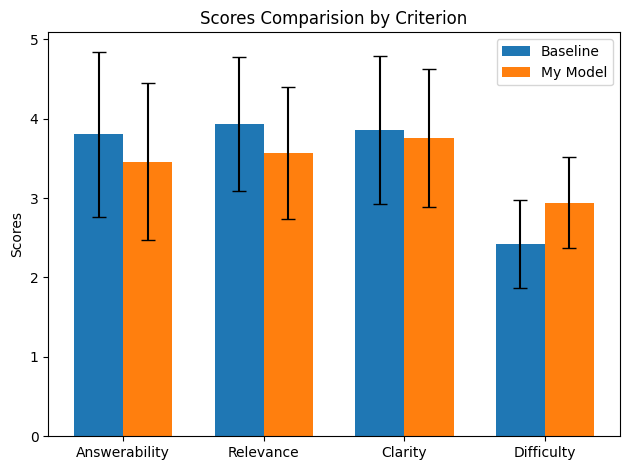

In [30]:
plot_comparision_bar_chart(baseline_avg, my_model_avg, list(baseline_sds.values()), list(my_model_sds.values()))

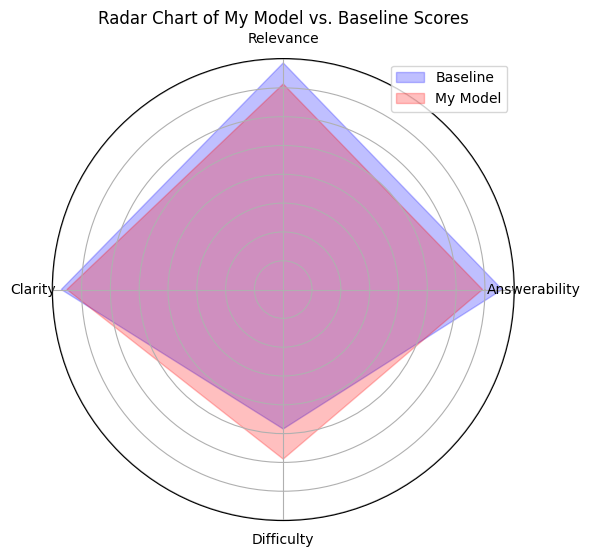

In [31]:
plot_comparision_radar_plot(baseline_avg, my_model_avg, baseline_sds, my_model_sds)

For Distractors

GPT Baseline

In [32]:
dis_aspects = ['Readability', 'Incorrectness', 'Diversity', 'Plausibility']
# economic depression
gpt_baseline_economic_depression_1 = get_scores("economic_depression", model_name='mixqg', evaluator='chat_gpt_4o', run_number=1, distractor_scores=True)
gpt_baseline_economic_depression_2 = get_scores("economic_depression", model_name='mixqg', evaluator='chat_gpt_4o', run_number=2, distractor_scores=True)
gpt_baseline_economic_depression_avg = get_average_score_among_runs([gpt_baseline_economic_depression_1, gpt_baseline_economic_depression_2], dis_aspects)

# personality
gpt_baseline_personality_1 = get_scores("personality", model_name='mixqg', evaluator='chat_gpt_4o', run_number=1, distractor_scores=True)
gpt_baseline_personality_2 = get_scores("personality", model_name='mixqg', evaluator='chat_gpt_4o', run_number=2, distractor_scores=True)
gpt_baseline_personality_avg = get_average_score_among_runs([gpt_baseline_personality_1, gpt_baseline_personality_2], dis_aspects)

# personalized learning
gpt_baseline_personalized_learning_1 = get_scores("personalized_learning", model_name='mixqg', evaluator='chat_gpt_4o', run_number=1, distractor_scores=True)
gpt_baseline_personalized_learning_2 = get_scores("personalized_learning", model_name='mixqg', evaluator='chat_gpt_4o', run_number=2, distractor_scores=True)
gpt_baseline_personalized_learning_avg = get_average_score_among_runs([gpt_baseline_personalized_learning_1, gpt_baseline_personalized_learning_2], dis_aspects)

# final all avera
gpt_baseline_avg = get_average_score_among_articles([gpt_baseline_economic_depression_avg, gpt_baseline_personality_avg, gpt_baseline_personalized_learning_avg], dis_aspects)

Gemini Baseline

In [33]:
# economic depression
gemini_baseline_economic_depression_1 = get_scores("economic_depression", model_name='mixqg', evaluator='gemini', run_number=1, distractor_scores=True)
gemini_baseline_economic_depression_2 = get_scores("economic_depression", model_name='mixqg', evaluator='gemini', run_number=2, distractor_scores=True)
gemini_baseline_economic_depression_avg = get_average_score_among_runs([gemini_baseline_economic_depression_1, gemini_baseline_economic_depression_2], dis_aspects)

# personality
gemini_baseline_personality_1 = get_scores("personality", model_name='mixqg', evaluator='gemini', run_number=1, distractor_scores=True)
gemini_baseline_personality_2 = get_scores("personality", model_name='mixqg', evaluator='gemini', run_number=2, distractor_scores=True)
gemini_baseline_personality_avg = get_average_score_among_runs([gemini_baseline_personality_1, gemini_baseline_personality_2], dis_aspects)

# personalized learning
gemini_baseline_personalized_learning_1 = get_scores("personalized_learning", model_name='mixqg', evaluator='gemini', run_number=1, distractor_scores=True)
gemini_baseline_personalized_learning_2 = get_scores("personalized_learning", model_name='mixqg', evaluator='gemini', run_number=2, distractor_scores=True)
gemini_baseline_personalized_learning_avg = get_average_score_among_runs([gemini_baseline_personalized_learning_1, gemini_baseline_personalized_learning_2], dis_aspects)

# final all average
gemini_baseline_avg = get_average_score_among_articles([gemini_baseline_economic_depression_avg, gemini_baseline_personality_avg, gemini_baseline_personalized_learning_avg], dis_aspects)

GPT My Model

In [34]:
# economic depression
gpt_my_model_economic_depression_1 = get_scores("economic_depression", model_name='my_model', evaluator='chat_gpt_4o', run_number=1, distractor_scores=True)
gpt_my_model_economic_depression_2 = get_scores("economic_depression", model_name='my_model', evaluator='chat_gpt_4o', run_number=2, distractor_scores=True)
gpt_my_model_economic_depression_avg = get_average_score_among_runs([gpt_my_model_economic_depression_1, gpt_my_model_economic_depression_2], dis_aspects)

# personality
gpt_my_model_personality_1 = get_scores("personality", model_name='my_model', evaluator='chat_gpt_4o', run_number=1, distractor_scores=True)
gpt_my_model_personality_2 = get_scores("personality", model_name='my_model', evaluator='chat_gpt_4o', run_number=2, distractor_scores=True)
gpt_my_model_personality_avg = get_average_score_among_runs([gpt_my_model_personality_1, gpt_my_model_personality_2], dis_aspects)

# personalized learning
gpt_my_model_personalized_learning_1 = get_scores("personalized_learning", model_name='my_model', evaluator='chat_gpt_4o', run_number=1, distractor_scores=True)
gpt_my_model_personalized_learning_2 = get_scores("personalized_learning", model_name='my_model', evaluator='chat_gpt_4o', run_number=2, distractor_scores=True)
gpt_my_model_personalized_learning_avg = get_average_score_among_runs([gpt_my_model_personalized_learning_1, gpt_my_model_personalized_learning_2], dis_aspects)

# final all average
gpt_my_model_avg = get_average_score_among_articles([gpt_my_model_economic_depression_avg, gpt_my_model_personality_avg, gpt_my_model_personalized_learning_avg], dis_aspects)

Gemini My Model

In [35]:
# economic depression
gemini_my_model_economic_depression_1 = get_scores("economic_depression", model_name='my_model', evaluator='gemini', run_number=1, distractor_scores=True)
gemini_my_model_economic_depression_2 = get_scores("economic_depression", model_name='my_model', evaluator='gemini', run_number=2, distractor_scores=True)
gemini_my_model_economic_depression_avg = get_average_score_among_runs([gemini_my_model_economic_depression_1, gemini_my_model_economic_depression_2], dis_aspects)

# personality
gemini_my_model_personality_1 = get_scores("personality", model_name='my_model', evaluator='gemini', run_number=1, distractor_scores=True)
gemini_my_model_personality_2 = get_scores("personality", model_name='my_model', evaluator='gemini', run_number=2, distractor_scores=True)
gemini_my_model_personality_avg = get_average_score_among_runs([gemini_my_model_personality_1, gemini_my_model_personality_2], dis_aspects)

# personalized learning
gemini_my_model_personalized_learning_1 = get_scores("personalized_learning", model_name='my_model', evaluator='gemini', run_number=1, distractor_scores=True)
gemini_my_model_personalized_learning_2 = get_scores("personalized_learning", model_name='my_model', evaluator='gemini', run_number=2, distractor_scores=True)
gemini_my_model_personalized_learning_avg = get_average_score_among_runs([gemini_my_model_personalized_learning_1, gemini_my_model_personalized_learning_2], dis_aspects)

# final all average
gemini_my_model_avg = get_average_score_among_articles([gemini_my_model_economic_depression_avg, gemini_my_model_personality_avg, gemini_my_model_personalized_learning_avg], dis_aspects)

In [36]:
# get fuull scores
gpt_baseline_all = pd.concat([gpt_baseline_economic_depression_avg, gpt_baseline_personality_avg, gpt_baseline_personalized_learning_avg], ignore_index=False)
gemini_baseline_all = pd.concat([gemini_baseline_economic_depression_avg, gemini_baseline_personality_avg, gemini_baseline_personalized_learning_avg], ignore_index=False)
baseline_all = get_average_score_among_runs([gpt_baseline_all, gemini_baseline_all], dis_aspects)

gpt_my_model_all = pd.concat([gpt_my_model_economic_depression_avg, gpt_my_model_personality_avg, gpt_my_model_personalized_learning_avg], ignore_index=False)
gemini_my_model_all = pd.concat([gemini_my_model_economic_depression_avg, gemini_my_model_personality_avg, gemini_my_model_personalized_learning_avg], ignore_index=False)
my_model_all = get_average_score_among_runs([gpt_my_model_all, gemini_my_model_all], dis_aspects)

In [37]:
compare_mean(gpt_baseline_all, gpt_my_model_all, dis_aspects)

For Readability:
Baseline model: 4.743055555555555
My model: 3.522408963585434

For Incorrectness:
Baseline model: 4.533333333333333
My model: 3.7563025210084033

For Diversity:
Baseline model: 3.6875
My model: 3.0798319327731094

For Plausibility:
Baseline model: 3.2333333333333334
My model: 3.8221288515406164



In [38]:
compare_mean(gemini_baseline_all, gemini_my_model_all, dis_aspects)

For Readability:
Baseline model: 2.6847222222222222
My model: 2.764705882352941

For Incorrectness:
Baseline model: 2.4722222222222223
My model: 2.899159663865546

For Diversity:
Baseline model: 2.341666666666667
My model: 2.4873949579831933

For Plausibility:
Baseline model: 2.6347222222222224
My model: 2.8907563025210083



In [39]:
baseline_avg = get_all_average([gpt_baseline_avg, gemini_baseline_avg], dis_aspects)
my_model_avg = get_all_average([gpt_my_model_avg, gemini_my_model_avg], dis_aspects)
baseline_sds = get_std(baseline_all, dis_aspects)
my_model_sds = get_std(my_model_all, dis_aspects)

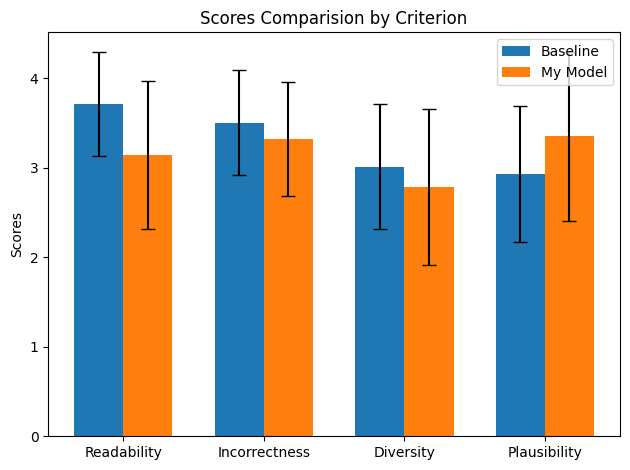

In [40]:
plot_comparision_bar_chart(baseline_avg, my_model_avg, list(baseline_sds.values()), list(my_model_sds.values()), dis_aspects)

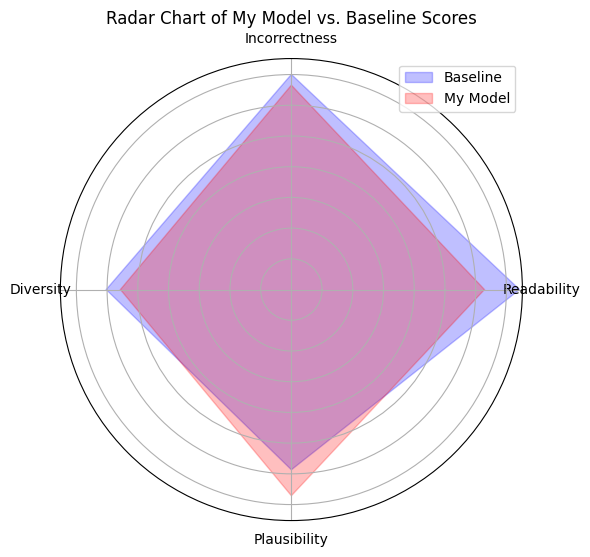

In [41]:
plot_comparision_radar_plot(baseline_avg, my_model_avg, baseline_sds, my_model_sds, dis_aspects)

In [53]:
def count_same_distractor(questions, keys=['distractor1', 'distractor2', 'distractor3']):
    cnt = 0
    for row in questions.iterrows():
        dis1 = row[1][keys[0]]
        dis2 = row[1][keys[1]]
        dis3 = row[1][keys[2]]

        if (dis1.lower().strip() == dis2.lower().strip()) and (dis1.lower().strip() == dis3.lower().strip()) and (dis2.lower().strip() == dis3.lower().strip()):
            cnt += 1
    return cnt

In [48]:
def count_different_distractor(questions, keys=['distractor1', 'distractor2', 'distractor3']):
    cnt = 0
    for row in questions.iterrows():
        dis1 = row[1][keys[0]]
        dis2 = row[1][keys[1]]
        dis3 = row[1][keys[2]]

        if (dis1.lower().strip() != dis2.lower().strip()) and (dis1.lower().strip() != dis3.lower().strip()) and (dis2.lower().strip() != dis3.lower().strip()):
            cnt += 1
    return cnt

In [43]:
def count_same_distractor_as_answer(questions, keys=['distractor1', 'distractor2', 'distractor3']):
    cnt = 0
    for row in questions.iterrows():
        dis1 = row[1][keys[0]]
        dis2 = row[1][keys[1]]
        dis3 = row[1][keys[2]]

        if dis1.lower().strip() == dis2.lower().strip() == dis3.lower().strip():
            cnt += 1
    return cnt

In [49]:
# baseline
eco_ques_path = "generated_questions/MixQG/economic_depression/questions_and_distractors_economic_depression.csv"
per_ques_path = "generated_questions/MixQG/personality/questions_and_distractors_personality.csv"
learn_ques_path = "generated_questions/MixQG/personalized_learning/questions_and_distractors_personalized_learning.csv"

ques_and_dis = pd.concat([pd.read_csv(eco_ques_path), pd.read_csv(per_ques_path), pd.read_csv(learn_ques_path)], ignore_index=True)
count_different_distractor(ques_and_dis, keys=['dis1', 'dis2', 'dis3'])

56

In [58]:
count_same_distractor(pd.read_csv(my_per_ques_path))

27

In [50]:
# my_model
my_eco_ques_path = "generated_questions/my_model/economic_depression/questions_and_distractors_economic_depression.csv"
my_per_ques_path = "generated_questions/my_model/personality/questions_and_distractors_personality.csv"
my_learn_ques_path = "generated_questions/my_model/personalized_learning/questions_and_distractors_personalized_learning.csv"

my_ques_and_dis = pd.concat([pd.read_csv(my_eco_ques_path), pd.read_csv(my_per_ques_path), pd.read_csv(my_learn_ques_path)], ignore_index=True)
count_different_distractor(my_ques_and_dis)

31

In [46]:
inds = np.array(my_model_all[my_model_all['Diversity'] >= 5].index)
inds = inds/3
my_ques_and_dis.iloc[inds, :]

,relation,nucleus,satellite,question,answer,distractor1,distractor2,distractor3
69,Manner-Means,Similar results were found,"using the Big Five Inventory ( BFI ),",How were Similar results found?,Using the Big Five Inventory ( BFI.,Using the Five - Factor Model ( NEO - PI - R).,Using the assessment tools measuring similar constructs across countries.,Using the Five - Factor Model ( NEO - PI - R).


In [47]:
inds = []
queses = pd.read_csv(per_ques_path)
for r in queses.iterrows():
    dis1 = r[1]['dis1']
    dis2 = r[1]['dis2']
    dis3 = r[1]['dis3']
    if (dis1.lower().strip() != dis2.lower().strip()) and (dis2.lower().strip() != dis3.lower().strip()) and (dis1.lower().strip() != dis3.lower().strip()):
        inds.append(r[0])

queses.iloc[inds, :]

,Unnamed: 0,source_sent,question,answer,dis1,dis2,dis3
0,0,"Personality is any person's collection of interrelated behavioral, cognitive and emotional patterns that comprise a person’s unique adjustment to life.",What is a person's collection of?,"Interrelated behavioral, cognitive and emotional patterns.",Personality traits.,"Interrelated behavioral, cognitive and emotional patterns.",Interrelated cognitive and emotional patterns.
3,3,"\n\nAlthough there is no consensus definition of personality, most theories focus on motivation and psychological interactions with one's environment.",What is the main focus of most theories of personality?,Motivation and psychological interactions.,The influence of culture on personality.,The relationship between personality and environment.,The influence of personality traits on social relationships.
5,5,"Trait-based personality theories, such as those defined by Raymond Cattell, define personality as traits that predict an individual's behavior.",Who defined personality as traits that predict an individual's behavior?,Raymond Cattell.,James.,Judith Rich.,Thomas Jefferson.
8,8,"\n\nThe study of the psychology of personality, called personality psychology, attempts to explain the tendencies that underlie differences in behavior.",What is the branch of psychology that studies personality?,Personality psychology.,Personality theory.,Personality development.,Personality assessment.
11,11,"Psychologists have taken many different approaches to the study of personality, including biological, cognitive, learning, and trait-based theories, as well as psychodynamic, and humanistic approaches.",What type of approach is personology?,Humanistic approaches.,Psychodynamic approaches.,Cognitive approaches.,Instrumental approaches.
12,12,"The various approaches used to study personality today reflect the influence of the first theorists in the field, a group that includes Sigmund Freud, Alfred Adler, Gordon Allport, Hans Eysenck, Abraham Maslow, and Carl Rogers.",Who was the first person to study personality?,Sigmund Freud.,James.,Judith Rich.,Alfred Adler.
13,13,"The various approaches used to study personality today reflect the influence of the first theorists in the field, a group that includes Sigmund Freud, Alfred Adler, Gordon Allport, Hans Eysenck, Abraham Maslow, and Carl Rogers.",Who was the first person to study personality?,Alfred Adler.,Thomas Jefferson.,Jacques Gélis.,Henry A. Murray.
14,14,"The various approaches used to study personality today reflect the influence of the first theorists in the field, a group that includes Sigmund Freud, Alfred Adler, Gordon Allport, Hans Eysenck, Abraham Maslow, and Carl Rogers.",What is the name of the psychologist who has been involved in the study of personality?,Gordon Allport.,Thomas Jefferson.,Alfred Adler.,Judith Rich Harris.
15,15,"The various approaches used to study personality today reflect the influence of the first theorists in the field, a group that includes Sigmund Freud, Alfred Adler, Gordon Allport, Hans Eysenck, Abraham Maslow, and Carl Rogers.",Whose Personality Questionnaire was developed in the 1960s?,Hans Eysenck.,Thomas Jefferson.,Judith Rich Harris.,Alfred Adler.
16,16,"The various approaches used to study personality today reflect the influence of the first theorists in the field, a group that includes Sigmund Freud, Alfred Adler, Gordon Allport, Hans Eysenck, Abraham Maslow, and Carl Rogers.",Who was the first person to use the Big Five?,Abraham Maslow.,Thomas Jefferson.,Judith Rich Harris.,Sigmund Freud.
